In [1]:
# Step (a) Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical


In [2]:
# Step (b) Load the training and testing data
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")

# Split features (X) and labels (y)
X_train = train_data.iloc[:, 1:].values / 255.0   # normalize pixel values
y_train = to_categorical(train_data.iloc[:, 0].values, 10)

X_test = test_data.iloc[:, 1:].values / 255.0
y_test = to_categorical(test_data.iloc[:, 0].values, 10)



In [3]:
# Step (c) Define the network architecture using Keras
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # 784 = 28x28 pixels
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])



In [13]:

# Step (d) Compile and train the model using SGD optimizer for 11 epochs
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=11, batch_size=256, verbose=2)



Epoch 1/11
235/235 - 4s - loss: 1.7295 - accuracy: 0.5382 - val_loss: 1.0896 - val_accuracy: 0.7764 - 4s/epoch - 15ms/step
Epoch 2/11
235/235 - 2s - loss: 0.8217 - accuracy: 0.8112 - val_loss: 0.6212 - val_accuracy: 0.8429 - 2s/epoch - 7ms/step
Epoch 3/11
235/235 - 1s - loss: 0.5625 - accuracy: 0.8532 - val_loss: 0.4819 - val_accuracy: 0.8687 - 1s/epoch - 6ms/step
Epoch 4/11
235/235 - 2s - loss: 0.4652 - accuracy: 0.8740 - val_loss: 0.4147 - val_accuracy: 0.8862 - 2s/epoch - 7ms/step
Epoch 5/11
235/235 - 1s - loss: 0.4121 - accuracy: 0.8869 - val_loss: 0.3744 - val_accuracy: 0.8963 - 1s/epoch - 5ms/step
Epoch 6/11
235/235 - 1s - loss: 0.3781 - accuracy: 0.8954 - val_loss: 0.3471 - val_accuracy: 0.9035 - 1s/epoch - 5ms/step
Epoch 7/11
235/235 - 1s - loss: 0.3540 - accuracy: 0.9015 - val_loss: 0.3276 - val_accuracy: 0.9084 - 1s/epoch - 5ms/step
Epoch 8/11
235/235 - 1s - loss: 0.3352 - accuracy: 0.9063 - val_loss: 0.3111 - val_accuracy: 0.9126 - 1s/epoch - 6ms/step
Epoch 9/11
235/235 - 1s

In [14]:
# Step (e) Evaluate the network
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")



Test Accuracy: 0.9202
Test Loss: 0.2767


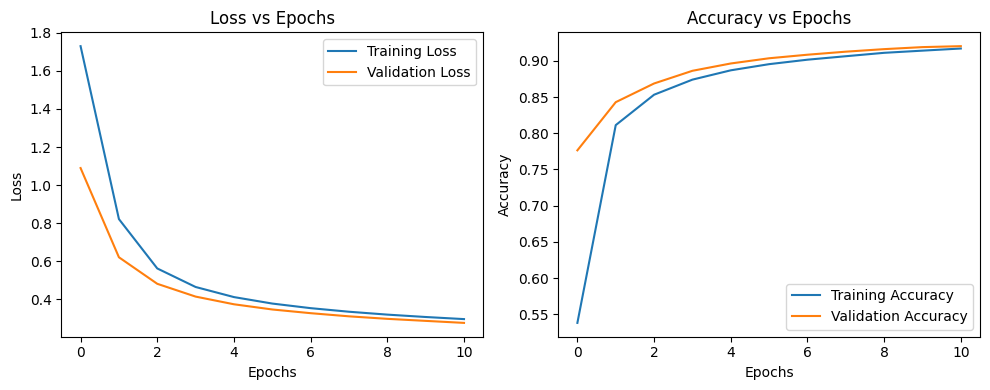

In [15]:
# Step (f) Plot the training loss and accuracy
plt.figure(figsize=(10, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()